In [1]:
#Importamos las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial.distance import pdist, squareform

In [54]:
#Leemos el archivo 

usuarios = pd.read_csv('/Users/rodolfopardo/Downloads/usuarios.csv')



In [55]:
usuarios

,Unnamed: 0,Rodolfo,Gustavo,Daniel,Felipe,Lorenzo,Agustina,Cecilia,Julieta
0,Sociedad,4,5,4,1,2,4,5,4
1,Deportes,2,4,2,2,5,4,4,4
2,Gym,3,4,2,2,5,4,4,4
3,Politica,4,1,5,2,2,2,5,3
4,Espectaculos,3,1,3,5,3,4,4,3


In [56]:
#Vamos a cambiar el nombre de las columnas

columnas = ['Secciones','Rodolfo', 'Gustavo', 'Damián', 'Felipe', 'Lorenzo' ,'Agustina', 'Cecilia', 'Julieta']

In [57]:
usuarios.columns = columnas

In [58]:
#Volvemos a revisar nuestro dataframe

usuarios

,Secciones,Rodolfo,Gustavo,Damián,Felipe,Lorenzo,Agustina,Cecilia,Julieta
0,Sociedad,4,5,4,1,2,4,5,4
1,Deportes,2,4,2,2,5,4,4,4
2,Gym,3,4,2,2,5,4,4,4
3,Politica,4,1,5,2,2,2,5,3
4,Espectaculos,3,1,3,5,3,4,4,3


In [59]:
#Algunos datos estadisticos interesantes 

usuarios.describe()


,Rodolfo,Gustavo,Damián,Felipe,Lorenzo,Agustina,Cecilia,Julieta
count,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.20000,3.000000,3.20000,2.400000,3.400000,3.600000,4.400000,3.600000
std,0.83666,1.870829,1.30384,1.516575,1.516575,0.894427,0.547723,0.547723
min,2.00000,1.000000,2.00000,1.000000,2.000000,2.000000,4.000000,3.000000
25%,3.00000,1.000000,2.00000,2.000000,2.000000,4.000000,4.000000,3.000000
50%,3.00000,4.000000,3.00000,2.000000,3.000000,4.000000,4.000000,4.000000
75%,4.00000,4.000000,4.00000,2.000000,5.000000,4.000000,5.000000,4.000000
max,4.00000,5.000000,5.00000,5.000000,5.000000,4.000000,5.000000,4.000000


In [60]:
#Correlaciones entre los usuarios 

corr = usuarios.corr()
corr.style.background_gradient(cmap='coolwarm')

,Rodolfo,Gustavo,Damián,Felipe,Lorenzo,Agustina,Cecilia,Julieta
Rodolfo,1,-0.159719,0.870864,-0.275839,-0.866921,-0.534522,0.872872,-0.327327
Gustavo,-0.159719,1,-0.40996,-0.704907,0.352454,0.597614,0,0.9759
Damián,0.870864,-0.40996,1,-0.177003,-0.935585,-0.771744,0.910182,-0.560112
Felipe,-0.275839,-0.704907,-0.177003,1,0.0217391,0.147442,-0.541736,-0.662122
Lorenzo,-0.866921,0.352454,-0.935585,0.0217391,1,0.516047,-0.842701,0.541736
Agustina,-0.534522,0.597614,-0.771744,0.147442,0.516047,1,-0.612372,0.612372
Cecilia,0.872872,0,0.910182,-0.541736,-0.842701,-0.612372,1,-0.166667
Julieta,-0.327327,0.9759,-0.560112,-0.662122,0.541736,0.612372,-0.166667,1


Se puede observar como Gustavo y Julieta son los que tienen más correlación. 
En menor nivel, Cecilia con Damián y Cecilia con Rodolfo. 
También Rodolfo con Daniel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x82c061630>,
      dtype=object)

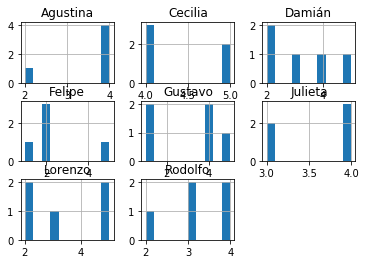

In [61]:
#Graficando las distribuciones 

usuarios.hist()

In [77]:
#Cambiamos el indice de nuestro dataframe a secciones 

usuarios = usuarios.set_index('Secciones')

In [84]:
#Graficando usuarios 

def ratings_usuarios(seccion1, seccion2):
    x = usuarios.T[seccion1]
    y = usuarios.T[seccion2]
    n = list(usuarios.T.index)

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=0)
    fig.set_figwidth(12)
    fig.set_figheight(8)
    plt.title("Preferencia Space for "+ seccion1 + " vs. " + seccion2, fontsize=20)
    ax.set_xlabel(seccion1, fontsize=16)
    ax.set_ylabel(seccion2, fontsize=16) 

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), fontsize=12)


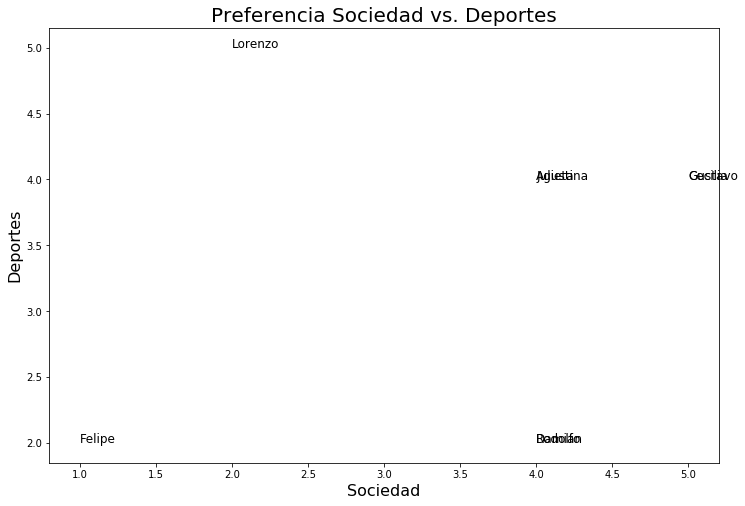

In [85]:
usuarios_scatter('Sociedad','Deportes')

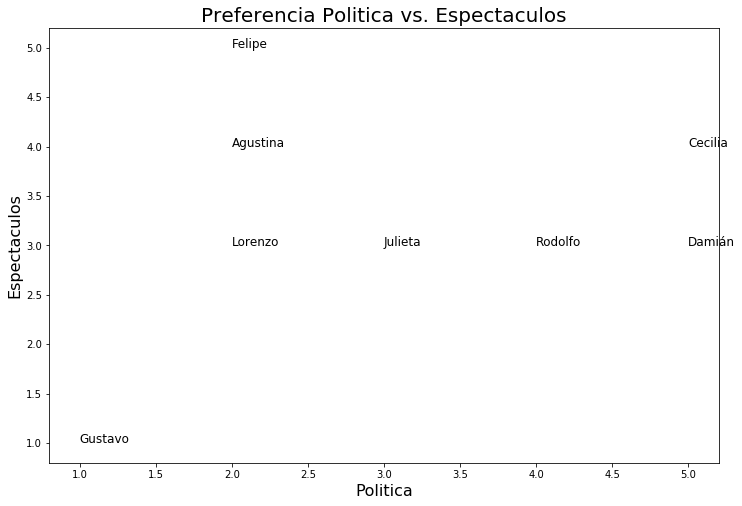

In [86]:
usuarios_scatter('Politica','Espectaculos')

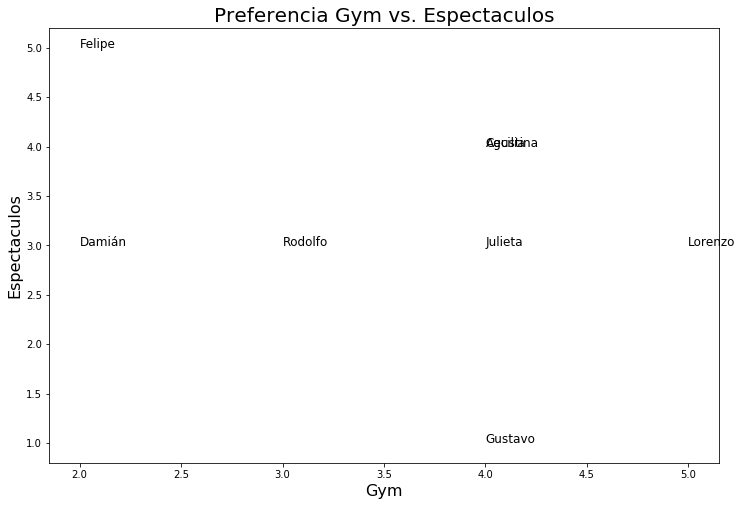

In [87]:
usuarios_scatter('Gym','Espectaculos')

In [88]:
#Calculando las distancias entre los usuarios por sistema euclidean

squareform(pdist(usuarios.T, 'euclidean'))

array([[0.        , 4.35889894, 1.41421356, 4.24264069, 4.58257569,
        3.16227766, 2.82842712, 2.44948974],
       [4.35889894, 0.        , 5.38516481, 6.40312424, 4.        ,
        3.31662479, 5.        , 3.        ],
       [1.41421356, 5.38516481, 0.        , 4.69041576, 5.56776436,
        4.24264069, 3.16227766, 3.46410162],
       [4.24264069, 6.40312424, 4.69041576, 0.        , 4.79583152,
        4.24264069, 5.83095189, 4.69041576],
       [4.58257569, 4.        , 5.56776436, 4.79583152, 0.        ,
        2.64575131, 4.58257569, 2.64575131],
       [3.16227766, 3.31662479, 4.24264069, 4.24264069, 2.64575131,
        0.        , 3.16227766, 1.41421356],
       [2.82842712, 5.        , 3.16227766, 5.83095189, 4.58257569,
        3.16227766, 0.        , 2.44948974],
       [2.44948974, 3.        , 3.46410162, 4.69041576, 2.64575131,
        1.41421356, 2.44948974, 0.        ]])

In [89]:


distancias = pd.DataFrame(1/(1 + squareform(pdist(usuarios.T, 'euclidean'))), 
                         index=usuarios.columns, columns=usuarios.columns)

distancias

,Rodolfo,Gustavo,Damián,Felipe,Lorenzo,Agustina,Cecilia,Julieta
Rodolfo,1.000000,0.186605,0.414214,0.190744,0.179129,0.240253,0.261204,0.289898
Gustavo,0.186605,1.000000,0.156613,0.135078,0.200000,0.231662,0.166667,0.250000
Damián,0.414214,0.156613,1.000000,0.175734,0.152259,0.190744,0.240253,0.224009
Felipe,0.190744,0.135078,0.175734,1.000000,0.172538,0.190744,0.146392,0.175734
Lorenzo,0.179129,0.200000,0.152259,0.172538,1.000000,0.274292,0.179129,0.274292
Agustina,0.240253,0.231662,0.190744,0.190744,0.274292,1.000000,0.240253,0.414214
Cecilia,0.261204,0.166667,0.240253,0.146392,0.179129,0.240253,1.000000,0.289898
Julieta,0.289898,0.250000,0.224009,0.175734,0.274292,0.414214,0.289898,1.000000


In [90]:
distancias.style.background_gradient(cmap='coolwarm')

,Rodolfo,Gustavo,Damián,Felipe,Lorenzo,Agustina,Cecilia,Julieta
Rodolfo,1,0.186605,0.414214,0.190744,0.179129,0.240253,0.261204,0.289898
Gustavo,0.186605,1,0.156613,0.135078,0.2,0.231662,0.166667,0.25
Damián,0.414214,0.156613,1,0.175734,0.152259,0.190744,0.240253,0.224009
Felipe,0.190744,0.135078,0.175734,1,0.172538,0.190744,0.146392,0.175734
Lorenzo,0.179129,0.2,0.152259,0.172538,1,0.274292,0.179129,0.274292
Agustina,0.240253,0.231662,0.190744,0.190744,0.274292,1,0.240253,0.414214
Cecilia,0.261204,0.166667,0.240253,0.146392,0.179129,0.240253,1,0.289898
Julieta,0.289898,0.25,0.224009,0.175734,0.274292,0.414214,0.289898,1


Podemos observar como Julieta y Agustina son muy afines.
También Damián con Rodolfo. 

In [91]:
#Calculando las distancias entre los usuarios por sistema Cosine 

distancias_cs = pd.DataFrame(1/(1 + squareform(pdist(usuarios.T, 'euclidean'))), 
                         index=usuarios.columns, columns=usuarios.columns)

distancias_cs

,Rodolfo,Gustavo,Damián,Felipe,Lorenzo,Agustina,Cecilia,Julieta
Rodolfo,1.000000,0.186605,0.414214,0.190744,0.179129,0.240253,0.261204,0.289898
Gustavo,0.186605,1.000000,0.156613,0.135078,0.200000,0.231662,0.166667,0.250000
Damián,0.414214,0.156613,1.000000,0.175734,0.152259,0.190744,0.240253,0.224009
Felipe,0.190744,0.135078,0.175734,1.000000,0.172538,0.190744,0.146392,0.175734
Lorenzo,0.179129,0.200000,0.152259,0.172538,1.000000,0.274292,0.179129,0.274292
Agustina,0.240253,0.231662,0.190744,0.190744,0.274292,1.000000,0.240253,0.414214
Cecilia,0.261204,0.166667,0.240253,0.146392,0.179129,0.240253,1.000000,0.289898
Julieta,0.289898,0.250000,0.224009,0.175734,0.274292,0.414214,0.289898,1.000000


In [92]:
distancias_cs.style.background_gradient(cmap='coolwarm')

,Rodolfo,Gustavo,Damián,Felipe,Lorenzo,Agustina,Cecilia,Julieta
Rodolfo,1,0.186605,0.414214,0.190744,0.179129,0.240253,0.261204,0.289898
Gustavo,0.186605,1,0.156613,0.135078,0.2,0.231662,0.166667,0.25
Damián,0.414214,0.156613,1,0.175734,0.152259,0.190744,0.240253,0.224009
Felipe,0.190744,0.135078,0.175734,1,0.172538,0.190744,0.146392,0.175734
Lorenzo,0.179129,0.2,0.152259,0.172538,1,0.274292,0.179129,0.274292
Agustina,0.240253,0.231662,0.190744,0.190744,0.274292,1,0.240253,0.414214
Cecilia,0.261204,0.166667,0.240253,0.146392,0.179129,0.240253,1,0.289898
Julieta,0.289898,0.25,0.224009,0.175734,0.274292,0.414214,0.289898,1


Por este sistema, Damián y Rodolfo como también Julieta y Agustina me siguen dando como los que tienen mas afinidad

In [94]:
#Si solo tomamos a Gustavo

distancias['Gustavo'].sort_values(ascending=False)[1:]



Julieta     0.250000
Agustina    0.231662
Lorenzo     0.200000
Rodolfo     0.186605
Cecilia     0.166667
Damián      0.156613
Felipe      0.135078
Name: Gustavo, dtype: float64

In [98]:
#Si solo tomamos a Cecilia 

distancias['Cecilia'].sort_values(ascending=False)[1:]


Julieta     0.289898
Rodolfo     0.261204
Agustina    0.240253
Damián      0.240253
Lorenzo     0.179129
Gustavo     0.166667
Felipe      0.146392
Name: Cecilia, dtype: float64

In [108]:
#Si solo tomamos a Lorenzo

similaridad_lorenzo = distancias['Lorenzo'].sort_values(ascending=False)[1:]


In [107]:
#Observamos las secciones mejores evaluadas 

recomendaciones = usuarios.copy()

for name, score in dict(similaridad_lorenzo).items():
    similaridad_lorenzo[name] = similaridad_lorenzo[name] * score
    
recomendaciones['Total'] = recomendaciones.sum(axis=1)
recomendaciones.sort_values('Total', ascending=False)

,Rodolfo,Gustavo,Damián,Felipe,Lorenzo,Agustina,Cecilia,Julieta,Total
Secciones,,,,,,,,,
Sociedad,4,5,4,1,2,4,5,4,29
Gym,3,4,2,2,5,4,4,4,28
Deportes,2,4,2,2,5,4,4,4,27
Espectaculos,3,1,3,5,3,4,4,3,26
Politica,4,1,5,2,2,2,5,3,24


Sociedad y Gym son las secciones que más alta evaluación obtuvieron

Conclusión: 

1. A Damián y Rodolfo les recomendaría noticias de Sociedad y Política ya que son similares. 
2. A Julieta y Agustina les recomendaría noticias de Sociedad, Deportes, Gym y Espectáculos. 
3. A Cecilia le recomendaría contenidos de Julieta. 
4. A Gustavo le recomendaría contenidos de Julieta.
5. A Lorenzo le recomendaría contenidos de Agustina o Julieta.
6. A Felipe le recomendaría contenidos de Rodolfo